In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the worksheet
data = pd.read_excel('/content/drive/MyDrive/Guvi/Online-Sales-Data- missing values.xlsx', sheet_name='Worksheet')
# Select relevant columns
sales_df = data[['Month', 'Product Name', 'Product Category', 'Units Sold', 'Total Revenue']].copy()
sales_df.columns = ['Month', 'Product', 'Category', 'Units Sold', 'Revenue']


In [4]:
# Check for missing values in the DataFrame
missing_values = sales_df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Month         2
Product       1
Category      2
Units Sold    1
Revenue       0
dtype: int64


In [5]:
# Drop rows with missing crucial values
sales_df = sales_df.dropna(subset=['Month', 'Product', 'Category', 'Units Sold', 'Revenue']).copy()

# Ensure correct data types
sales_df.loc[:, 'Units Sold'] = sales_df['Units Sold'].astype(int)
sales_df.loc[:, 'Revenue'] = sales_df['Revenue'].astype(float)

In [6]:
# Check for missing values in the DataFrame
missing_values = sales_df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Month         0
Product       0
Category      0
Units Sold    0
Revenue       0
dtype: int64


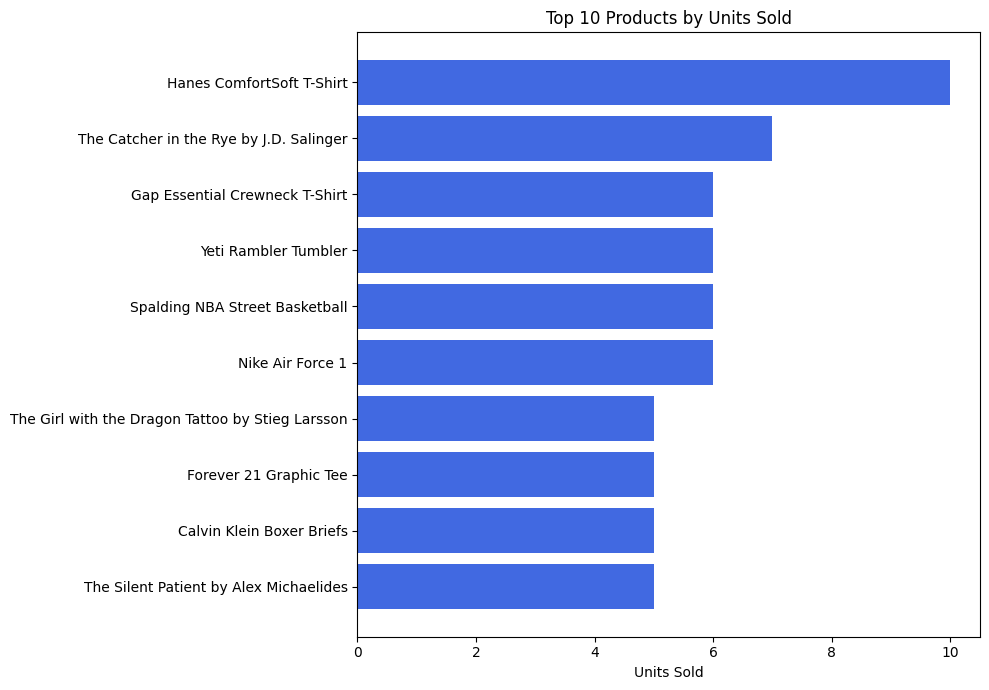

Product
Hanes ComfortSoft T-Shirt                           10.0
The Catcher in the Rye by J.D. Salinger              7.0
Gap Essential Crewneck T-Shirt                       6.0
Yeti Rambler Tumbler                                 6.0
Spalding NBA Street Basketball                       6.0
Nike Air Force 1                                     6.0
The Girl with the Dragon Tattoo by Stieg Larsson     5.0
Forever 21 Graphic Tee                               5.0
Calvin Klein Boxer Briefs                            5.0
The Silent Patient by Alex Michaelides               5.0
Name: Units Sold, dtype: float64


In [7]:
import matplotlib.pyplot as plt # importing the library for visualization

top_products = sales_df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 7))
plt.barh(top_products.index, top_products.values, color='royalblue')
plt.xlabel('Units Sold')
plt.title('Top 10 Products by Units Sold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print(top_products)

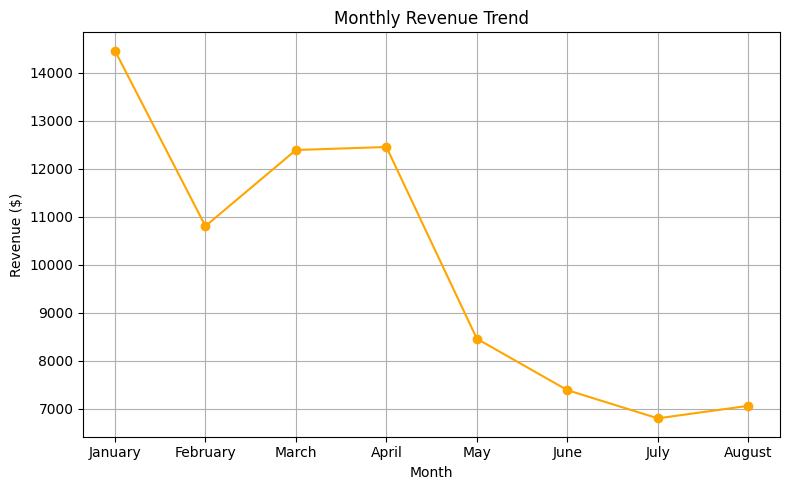

Month
January     14458.33
February    10803.37
March       12389.32
April       12451.69
May          8455.49
June         7384.55
July         6797.08
August       7058.14
Name: Revenue, dtype: float64


In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthly_revenue = sales_df.groupby('Month')['Revenue'].sum().reindex(month_order)
plt.figure(figsize=(8, 5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='orange')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
print(monthly_revenue)

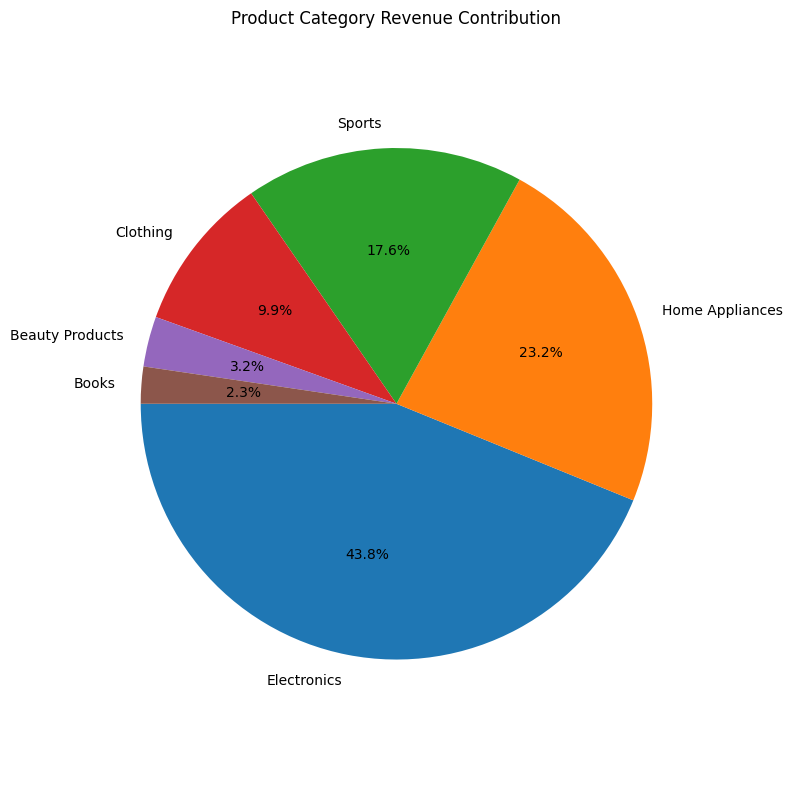

Category
Electronics        34982.41
Home Appliances    18486.17
Sports             14056.57
Clothing            7878.98
Beauty Products     2531.91
Books               1861.93
Name: Revenue, dtype: float64


In [15]:
#Pie plot for product category revenue contribution

category_revenue = sales_df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=180)
plt.title('Product Category Revenue Contribution')
plt.axis('equal')
plt.tight_layout()
plt.show()
print(category_revenue)

In [10]:
# Group by region and sum revenue
region_revenue = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

display(region_revenue)
print ("Total Revenue is in $")

,Total Revenue
Region,
North America,36844.34
Asia,22455.45
Europe,21268.06


Total Revenue is in $


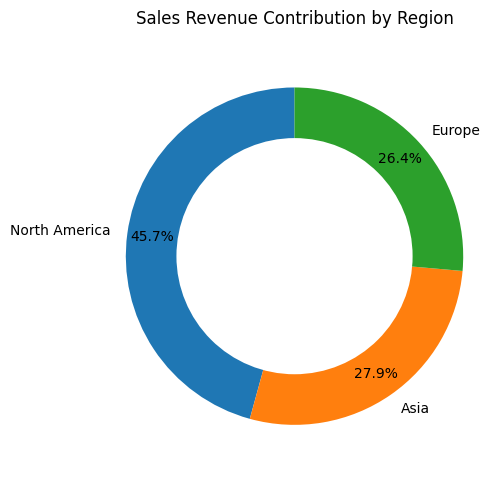

In [11]:


# Donut chart plotting
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    region_revenue,
    labels=region_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

# Draw center circle for donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sales Revenue Contribution by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [12]:
payment_method_revenue = data.groupby('Payment Method')['Total Revenue'].sum()
display(payment_method_revenue)

,Total Revenue
Payment Method,
Credit Card,51170.86
Debit Card,8128.93
PayPal,21268.06


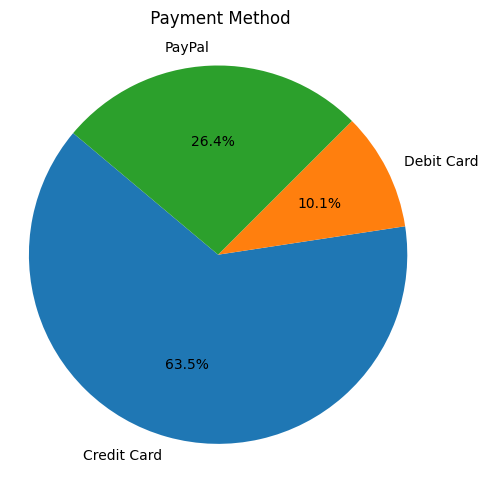

In [13]:
plt.figure(figsize=(5, 5))
plt.pie(payment_method_revenue, labels=payment_method_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title(' Payment Method')
plt.axis('equal')
plt.tight_layout()
plt.show()